In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
data = pd.read_csv("F:\Learning\DailyDelhiClimateTest.csv")
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\L'
<>:1: SyntaxWarning: invalid escape sequence '\L'
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14692\147603158.py:1: SyntaxWarning: invalid escape sequence '\L'
  data = pd.read_csv("F:\Learning\DailyDelhiClimateTest.csv")


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [12]:
data.describe()

,meantemp,humidity,wind_speed,meanpressure
count,114.000000,114.000000,114.000000,114.000000
mean,21.713079,56.258362,8.143924,1004.035090
std,6.360072,19.068083,3.588049,89.474692
min,11.000000,17.750000,1.387500,59.000000
25%,16.437198,39.625000,5.563542,1007.437500
50%,19.875000,57.750000,8.069444,1012.739316
75%,27.705357,71.902778,10.068750,1016.739583
max,34.500000,95.833333,19.314286,1022.809524


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [14]:
figure1 = px.line(data, x="date", y="meantemp", title='Mean Temperature')
figure1.show()

In [15]:
figure2 = px.line(data, x="date", y="humidity", title="Humidity in Delhi Over the Years")
figure2.show()

In [16]:
figure3 = px.line(data, x="date", y="wind_speed", title="Wind Speed in Delhi Over the Years")
figure3.show()

In [19]:
figure4 = px.scatter(data, x="humidity", y="meantemp", size="meantemp", trendline="ols", title="Relationship between humidity and meantemp")
figure4.show()

Analyzing Temperature change

In [18]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data.head()


,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1


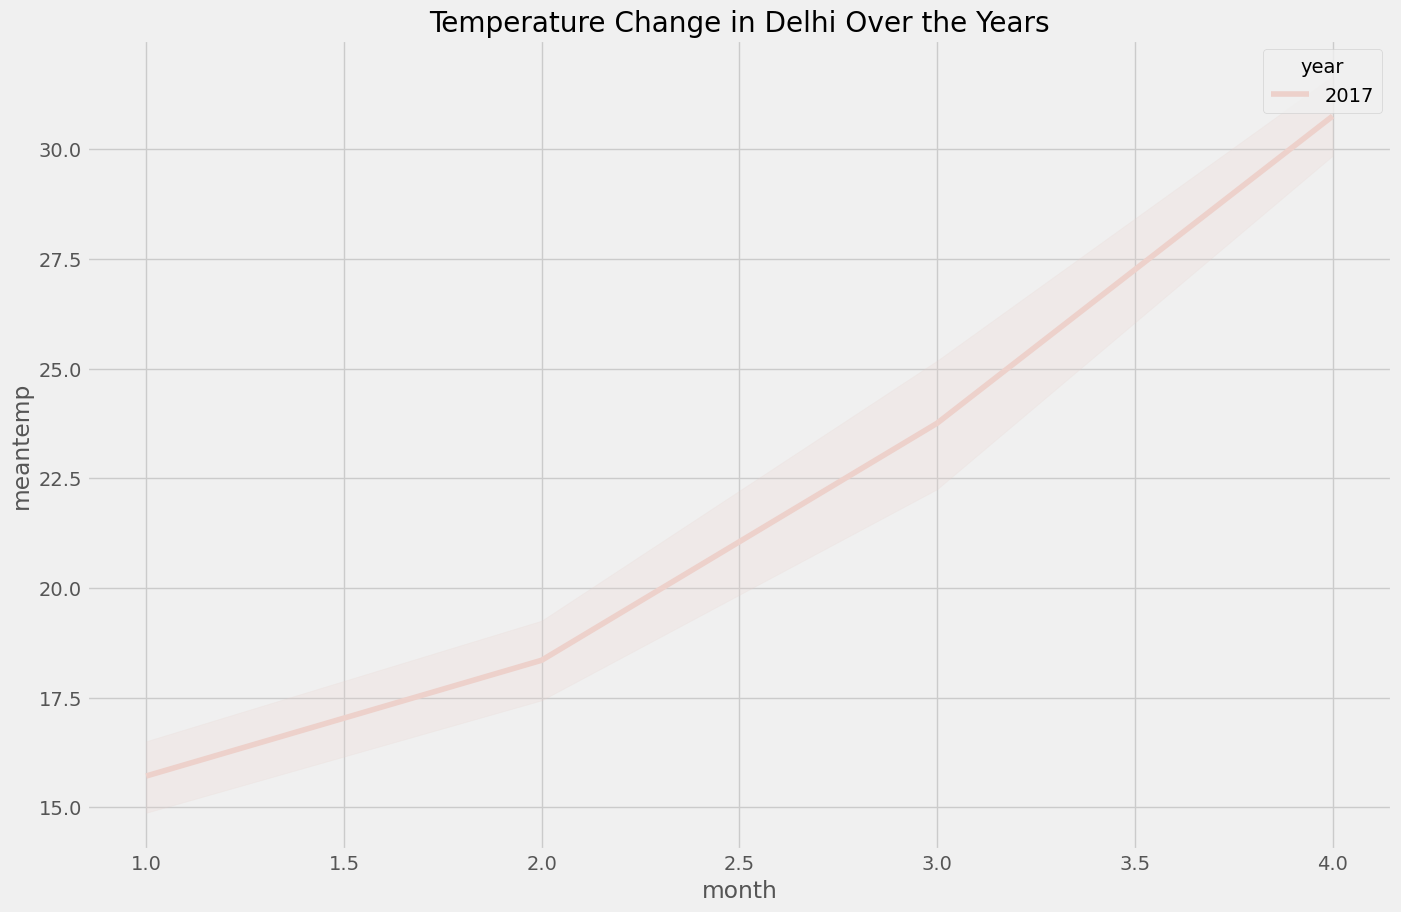

In [23]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title('Temperature Change in Delhi Over the Years')
sns.lineplot(data=data, x='month', y='meantemp', hue='year')
plt.show()

In [23]:
forecast_data = data.rename(columns={'date': 'ds', 'meantemp': 'y'})


In [24]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecast = model.make_future_dataframe(periods=365)
prediction = model.predict(forecast)
plot_plotly(model, prediction)


19:02:09 - cmdstanpy - INFO - Chain [1] start processing
19:02:09 - cmdstanpy - INFO - Chain [1] done processing
